<h1> 1. Warm-up </h1>

<h2> Text Classification</h2>

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [ ]:
from transformers import pipeline

clasifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
import pandas as pd
outputs = clasifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


<h2> Name Entity Recognition </h2>

In [ ]:
ner_tagger = pipeline("ner", aggregation_strategy = 'simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda:0


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556569,Mega,208,212
4,PER,0.590257,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


The Ent_pos pipeline classified the entities into ORG (Organization), LOC (Location), PER (Person). <code>aggregation_strategy</code> arguement groups the words according to the model's prediction.



<h2> Question Answering </h2>

In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want"
outputs = reader(question = question, context = text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


,score,start,end,answer
0,0.538529,335,358,an exchange of Megatron


<h2>Summarization</h2>

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length = 45, clean_up_tokenization_spaces = True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


<h1> 2. Dataset & Data storage method </h1>

<h1> HuggingFace's Dataset </h1>

In [ ]:
# from datasets import load_dataset

ModuleNotFoundError: No module named 'datasets'

In [ ]:
from huggingface_hub import list_datasets
all_datasets = list_datasets()

print(all_datasets)

<generator object HfApi.list_datasets at 0x7a0c3d4b0040>


In [ ]:
#dataset's list_datasets() method is corrupted, so we can use from huggingface_hub instead
from huggingface_hub import list_datasets
all_datasets = list(list_datasets(limit=2000))
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 2000 datasets currently available on the Hub
The first 10 are: [DatasetInfo(id='facebook/natural_reasoning', author='facebook', sha='99eea5dc6bfa45a925eb42600e81dc90377ba237', created_at=datetime.datetime(2025, 1, 30, 23, 29, 32, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 2, 21, 6, 2, 40, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=4285, downloads_all_time=None, likes=270, paperswithcode_id=None, tags=['task_categories:text-generation', 'language:en', 'license:cc-by-nc-4.0', 'size_categories:1M<n<10M', 'format:json', 'modality:text', 'library:datasets', 'library:pandas', 'library:mlcroissant', 'library:polars', 'arxiv:2502.13124', 'region:us'], trending_score=121, card_data=None, siblings=None), DatasetInfo(id='Congliu/Chinese-DeepSeek-R1-Distill-data-110k', author='Congliu', sha='8520b649430617c2be4490f424d251d09d835ed3', created_at=datetime.datetime(2025, 2, 17, 11, 45, 9, tzinfo=datetime.timezone.utc), last

In [ ]:
!pip install datasets
from datasets import load_dataset

emotions = load_dataset('emotion')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.3 MB/s eta 0:00:00


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions
#We can see this datasets is stored at Dictionary type and already been splitted

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

<h2> Arrow (column-based) data storage </h2>

**Apache Arrow vs Traditional way of data storage**
<ol>
  <li>Apache Arrow's Columnar Storage: Apache Arrow stores data in a columnar format. This means that all the values for a specific column are stored contiguously in memory. In our "emotion" dataset, all the "text" values would be stored together, and all the "label" values would be stored together.</li>
  <li>Traditional row-based storage: This means that all the values for a single record (row) are stored contiguously in memory. For example, in our "emotion" dataset, a row would store the "text" and "label" values together.
  <li>Advantages of Collumn-based over Arrow based method: perform <strong>better analytical operation</strong> (due to collumn nature: we can read only the columns we need); <strong>zero-copy reads</strong>: allows data to share without serialization.</li>
</ol>

In [ ]:
train_ds = emotions['train']
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

<h3> Perform comparision of retrieving data with traditional row-based method </h3>

In [ ]:
row_based_data = [
    {"text": "i didnt feel humiliated", "label": 0},
    {"text": "i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake", "label": 0},
    {"text": "im grabbing a minute to post i feel greedy wrong", "label": 3},
    {"text": "i am ever feeling nostalgic about the fireplace i will know that it is still on the property", "label": 2},
    {"text": "i am feeling grouchy", "label": 3},
    # ... and so on for all 16,000 rows
]

In [ ]:
#Achieve the same result as "train_ds['text'][:5]"
row_based_data[4]['text']
values = [row['text'] for row in row_based_data[:4]]
values

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property']

In [ ]:
#Load the dataset locally
train.txt = " " #Define the url of the dataset here
emotions_local = load_dataset("csv", data_files="train.txt", sep=";",
names=["text", "label"])

NameError: name 'train' is not defined

<h2>From dataset to Dataframe </h2>

In [ ]:
import pandas as pd
emotions.set_format(type = 'pandas')
df = emotions['train'][:]
# The [:] indexing forces the dataset to be eagerly loaded into memory.
# This can be useful if you need to manipulate the dataset as a standard Python object (like converting to a DataFrame).
# However, it may consume more memory for large datasets.
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


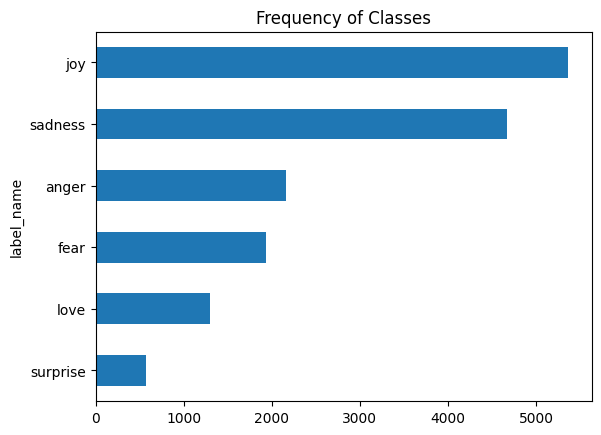

In [ ]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

The dataset is imbalanced. But to keep thing simple, we would still use this un-preprocessed version.

<Figure size 1000x600 with 0 Axes>

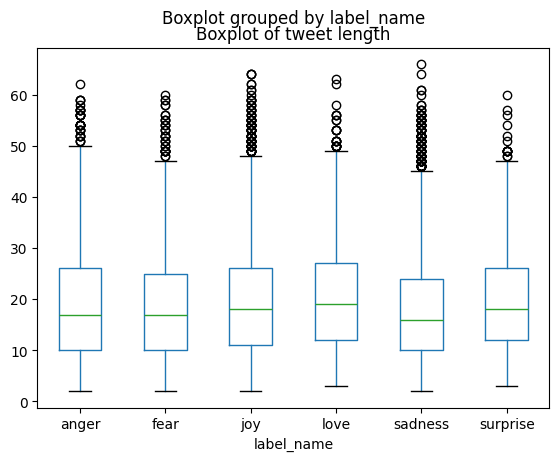

In [ ]:
df['word_per_tweet'] = df['text'].str.split().apply(len) #df['text'].str.split().count() will count the total tweet words. Apply function works rowly
plt.figure(figsize=(10, 6))
df.boxplot(column = 'word_per_tweet', by = 'label_name', grid = False )
plt.title("Boxplot of tweet length")
plt.show()

Let’s now figure out how we can convert these raw texts into a format suitable for Transformers! While we’re at it, let’s also reset the output format of our dataset since we don’t need the DataFrame format anymore

In [ ]:
emotions.reset_format()

<h2> Text to Tokens </h2>

<h3>Character tokenization </h3>

In [ ]:
  #Character tokenization
  text = "Tokenizing text is a core task of NLP."
  tokenizer_text = list(text) #Split text into a list of characters, even space and punctuation

  #Numericalize -> Create a dictionary ("i": 1, ...)
  token2idx = { ch: idx for idx, ch in enumerate(sorted(set(tokenizer_text))) }

<ul>
  <li><code>set()</code> create an unordered collection of unique element of a parse list. This effectively remove duplicated characters.</li>
  <li><code>sorted()</code> sort elements alphabetically. </li>
  <li><code>enumerate()</code> takes the sorted set of unique characters and returns an iterator that produces pairs of (index, character). </li>
  <li><code>{ ch: idx for idx, ch in ... }</code>: a dictionary comprehension, for each (index, character) pair produced by <code> enumarate()</code>, it creates (key:values) pair.</li>
  <li>The result maps each unique character into a numerical value</li>
</ul>

In [ ]:
#transform tokenizer_text into a list of token
input_toks = [token2idx[token] for token in tokenizer_text]


In this context, we use **one_hot encoding** insteads of label encoding due to the nature of word character that have no meaningful order. The DL model are very sensitive to this. Adding or subtracting the tokens' value (a, b) will give the result of value c (another token), while in one-hot case, adding **[1, 0, 0]** and **[0, 1, 0]** will give result **[1, 1, 0]** which implies the co-occurence of these 2 tokens.  

In [ ]:
import torch
import torch.nn.functional as F

#convert to Tensor
input_toks = torch.tensor(input_toks)

#Create one-hot matrix for input_toks
one_hot_matrix = F.one_hot(input_toks, num_classes = len(token2idx))
one_hot_matrix.shape
#shape: [38,20]: 38 input tokens, each consists of 20 dim as 20 unique token

torch.Size([38, 20])

In [ ]:
#Examine the first token
print(f"Token:{tokenizer_text[0]}")
print(f"Index:{input_toks[0]}")
print(f"One-hot:{one_hot_matrix[0]}")

Token:T
Index:5
One-hot:tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


<h2> Word Tokenization </h2>

instead of splitting a sentence into characters, we can split it into words and then map word into integer. The process goes the same as Character tokenization



<h2> Subword Tokenization </h2>

Subword tokenization is a compromise between Character tokenization and Word tokenization. <br>
The idea behind it is to combine the best aspects of character and word tokenization. On the one hand, we want to split rare words into smaller
units to allow the model to deal with complex words and misspellings.On the other
hand, we want to keep frequent words as unique entities so that we can keep the
length of our inputs to a manageable size.

In [ ]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text = "Tokenizing text is a core task of NLP."

encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

<h2> Tokenizing the whole dataset </h2>

In [ ]:
def tokenize(batches):
  return tokenizer(batches['text'], padding = True, truncation = True)

<code>padding=True</code> will pad the
examples with zeros to the size of the longest one in a batch, and <code>truncation=True</code>
will truncate the examples to the model’s maximum context size

In [ ]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


'attention_mask' in this case only assign the value 1 into the subwords that are not padding.

In [ ]:
emotion_encoded = emotions.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotion_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

The mapped dataset has 2 new features: 'input_ids' and 'attention_mask'

<h1>2. Training a Text Classifier </h1>  

Models like DistilBERT are pretrained to **predict masked
words in a sequence of text**. However, we can’t use these language models directly for
text classification; we need to modify them slightly.

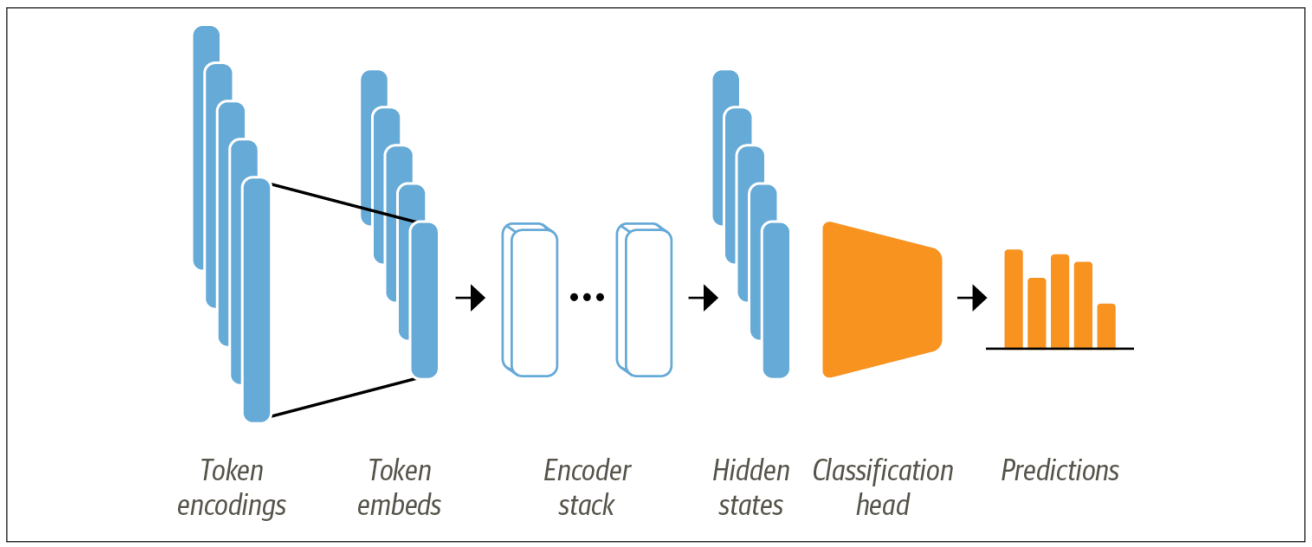

Figure 2.1: This is the architecture used for sequence classification with an encoder-based transformer. It consists of the **model's pretrained** body combined with a **custom classification head**.

We have two options to train such a model on Twitter dataset:
<ul>
<li>Feature extraction: we use the hidden states as features and just train a classifier on them, without training the pretrained body.</li>
<li>Fine-tuning: We train the whole model end-to-end, which also updates the parameters of the body </li>
</ul>

<h2>2.1 Transformers as Feature Extractors </h2>

In [ ]:
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'gpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

<h3> Extracting the last Hidden states </h3>

In [ ]:
text = "this is a text"
input = tokenizer(text, return_tensors = 'pt')
print(input['input_ids'].shape)
print(input)

torch.Size([1, 6])
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [ ]:
input = {k: v.to(device) for k, v in input.items()}
#retrieve the key-value pair in input. Input variable have 2 key-value pairs:
# - ('input_ids': key 1, tensor([[]]: value 1))
#- ('attention_mask': key 2, tensor([[]]: value 2))
#Only tensor can be moved to a new device

In [ ]:
with torch.no_grad(): #disable the automatic calucation of gradien
  output = model(**input)
print(output)

BaseModelOutput(last_hidden_state=tensor([[[-0.2535, -0.1091,  0.0759,  ..., -0.1054,  0.2257,  0.4615],
         [-0.7154, -0.2742, -0.0954,  ..., -0.3597,  0.5174,  0.3450],
         [-0.4100, -0.2195,  0.1850,  ..., -0.0136,  0.1607,  1.0422],
         [-0.2523, -0.0254,  0.2472,  ..., -0.1637,  0.0865,  1.0516],
         [-0.0570, -0.1057,  0.0662,  ...,  0.0584,  0.1034,  0.2971],
         [ 0.9184,  0.1577, -0.4105,  ...,  0.1509, -0.7327, -0.1572]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
output.last_hidden_state.shape

torch.Size([1, 6, 768])

the "last hidden states" tensor returned has shape [batch_size, n_tokens, hidden_dim]. For classification tasks, it is common practice to just use the hidden state corresponding to [CLS] token as the input feature, because [CLS] often contains the contextual information from the entire input sequence. This token appear at the start of each sequence.

In [ ]:
#retrieve the vector related with [CLS] token only
output.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
  #move input tensor to GPU
  input = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  #extract last hidden state
  with torch.no_grad():
    last_hidden_state = model(**input).last_hidden_state
  #return vector for [CLS] token
  return {"hidden_state":last_hidden_state[:, 0].cpu().numpy()}

<code>"hidden_state":last_hiden_state[:, 0].cpu().numpy()</code>: because Python-inbuit <code>map()</code> function require the mapping function to return in Numpy or Python objects (basis data types: int, float, bool, str/ collections: list, tuple, dict, set). Therefore, we must move the output to CPU first, then convert them into Numpy object.

In [ ]:
#convert inputs_ids and attention_mask into "torch" format:
emotion_encoded.set_format("torch", columns = ['input_ids', 'attention_mask', 'label'])

In [ ]:
emotion_hidden = emotion_encoded.map(extract_hidden_states, batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

we did not set <code>batch_size=None</code> in this case, which means the default
batch_size=1000 is used instead

<h3> Create a feature matrix </h3>

In [ ]:
emotion_hidden.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
 'validation': ['text',
  'label',
  'input_ids',
  'attention_mask',
  'hidden_state'],
 'test': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']}

In [ ]:
import numpy as np

X_train  = np.array(emotion_hidden['train']['hidden_state'])
Y_train = np.array(emotion_hidden['train']['label'])
X_valid = np.array(emotion_hidden['validation']['hidden_state'])
Y_valid = np.array(emotion_hidden['validation']['label'])


<h3>Visualizing the training set </h3>

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Scale feature to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
#innitialize and fit map
mapper = UMAP(n_components=2, metric = 'cosine').fit(X_scaled)
#Create a Dataframe of 2D embbedings
df_emb = pd.DataFrame(mapper.embedding_, columns = ['X', 'Y'])
df_emb['label'] = Y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.044768,6.734940,0
1,-3.240852,6.486937,0
2,4.741199,3.285025,3
3,-2.662902,4.555326,2
4,-3.612535,4.603402,3


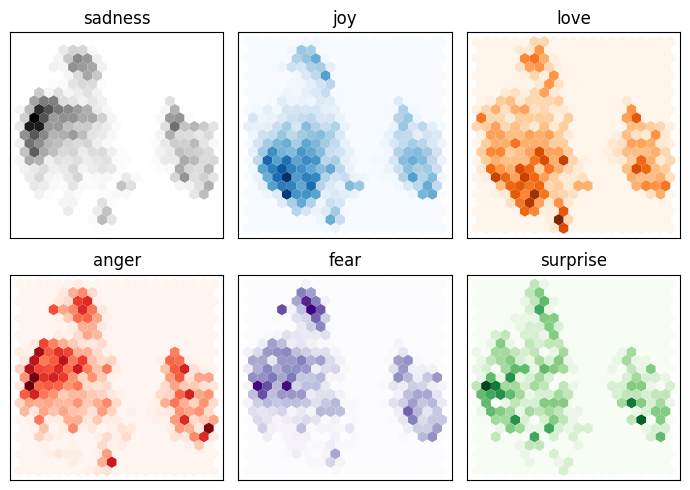

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize = (7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens" ]
labels = emotions['train'].features['label'].names #['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap = cmap,
                 gridsize = 20, linewidths = (0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
print(df_emb['label'].value_counts())
print(emotions['train']['label'])

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64
[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1

In [ ]:
emotions['train'].column_names

['text', 'label']

In [ ]:
labels = emotions['train'].features['label']

<h3> Train a simple classifier </h3>

In [ ]:
from sklearn.linear_model import LogisticRegression

#increase max_iter to guarentee convergenc
lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_valid, Y_valid)

0.635

<h3> Visualization of the model result: Confusion Matrix for multi-class classification </h3>

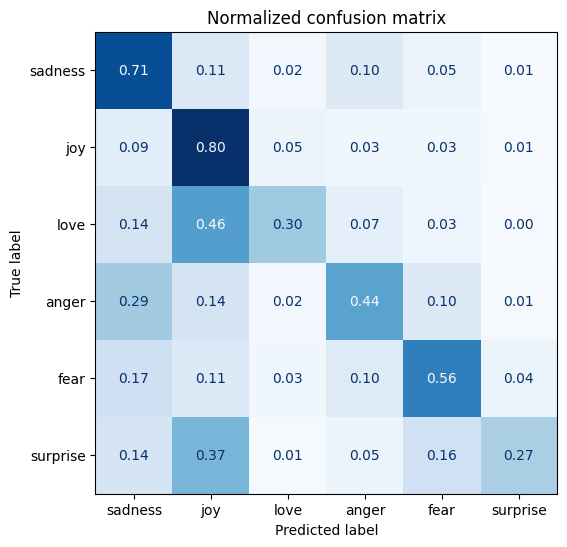

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

Y_preds = lr_clf.predict(X_valid)

plot_confusion_matrix(Y_preds, Y_valid, labels)

<ul>
  <li>The diagonal values represent Correct prediction. The correct rate of 'sadness' and 'joy' is the highest, which may related to the largest sample size of this class in the dataset. </li>
  <li>The other values represents False prediction. "Love" and "Surprise" is mostly confused with "Joy" as they yield the same underlying structure, the same as "anger" with "sadness".
</ul>